# Load and Inspect Data

In [1]:
# Import necessary libraries
import pandas as pd

# Load datasets
users_df = pd.read_csv('Users.csv', encoding='latin1')
books_df = pd.read_csv('Books.csv', encoding='latin1')
ratings_df = pd.read_csv('Ratings.csv', encoding='latin1')

# Display first few rows of each DataFrame to understand the structure
print("Users Data:")
display(users_df.head())

print("Books Data:")
display(books_df.head())

print("Ratings Data:")
display(ratings_df.head())

# Get summary information of each DataFrame
print("Users Data Info:")
users_df.info()

print("Books Data Info:")
books_df.info()

print("Ratings Data Info:")
ratings_df.info()


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\4078385577.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv', encoding='latin1')


Users Data:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Books Data:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Ratings Data:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Users Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
Books Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 n

# Data Cleaning

In [2]:
# Handling missing values in Users DataFrame
print("Missing values in Users Data:")
print(users_df.isnull().sum())

# Fill missing 'Age' values with the median age, and clean 'Location' if necessary
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)
users_df['Location'].fillna('Unknown', inplace=True)

# Check for any inconsistencies in the 'Age' column (e.g., negative values, extremely high values)
# Assuming reasonable age range is between 10 and 100
users_df = users_df[(users_df['Age'] >= 10) & (users_df['Age'] <= 100)]

# Handling missing or inconsistent values in Books DataFrame
print("\nMissing values in Books Data:")
print(books_df.isnull().sum())

# Remove books with missing 'Book-Title' as they may not provide valuable information for recommendations
books_df = books_df[books_df['Book-Title'].notna()]

# Fix any issues in 'Year-Of-Publication' (e.g., non-numeric values)
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df['Year-Of-Publication'].fillna(0, inplace=True)  # Fill with 0 or appropriate value if year is missing
books_df = books_df[books_df['Year-Of-Publication'] > 0]  # Remove invalid publication years

# Handling Ratings DataFrame
print("\nMissing values in Ratings Data:")
print(ratings_df.isnull().sum())

# Remove ratings with missing 'Book-Rating' values, if any
ratings_df = ratings_df[ratings_df['Book-Rating'].notna()]

# Optional: Exclude implicit ratings (where 'Book-Rating' == 0) for now, focusing on explicit feedback
explicit_ratings_df = ratings_df[ratings_df['Book-Rating'] > 0]

# Display cleaned data samples
print("\nCleaned Users Data:")
display(users_df.head())

print("Cleaned Books Data:")
display(books_df.head())

print("Cleaned Ratings Data:")
display(explicit_ratings_df.head())


Missing values in Users Data:
User-ID          0
Location         0
Age         110762
dtype: int64

Missing values in Books Data:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\3251526645.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['Age'].fillna(users_df['Age'].median(), inplace=True)
C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\3251526645.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 


Missing values in Ratings Data:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Cleaned Users Data:


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\3251526645.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df['Year-Of-Publication'].fillna(0, inplace=True)  # Fill with 0 or appropriate value if year is missing


,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


Cleaned Books Data:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Cleaned Ratings Data:


,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


# Exploratory Data Analysis (EDA)

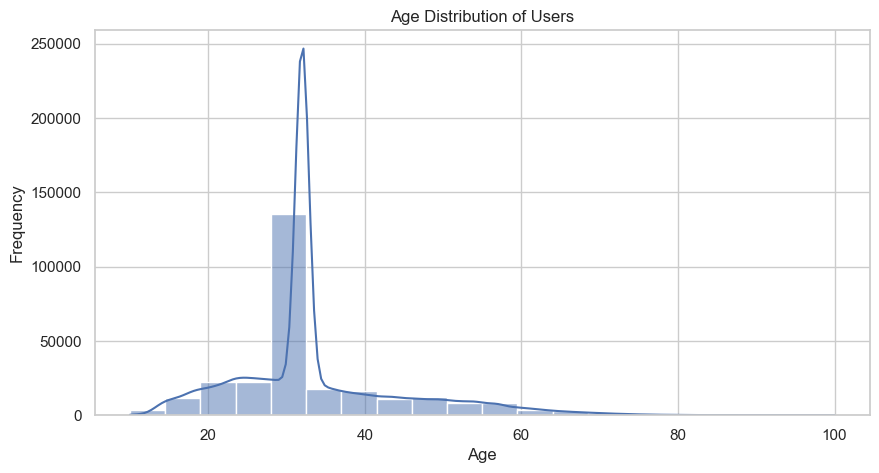

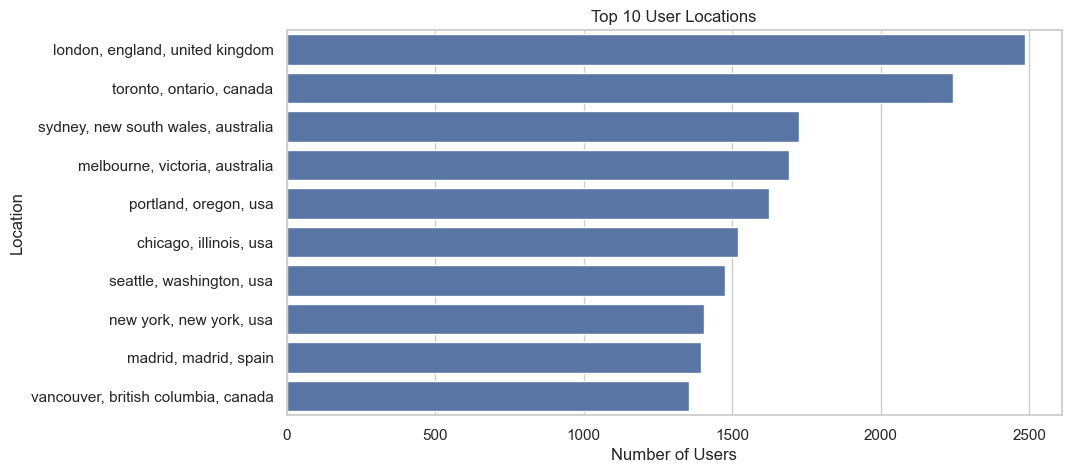

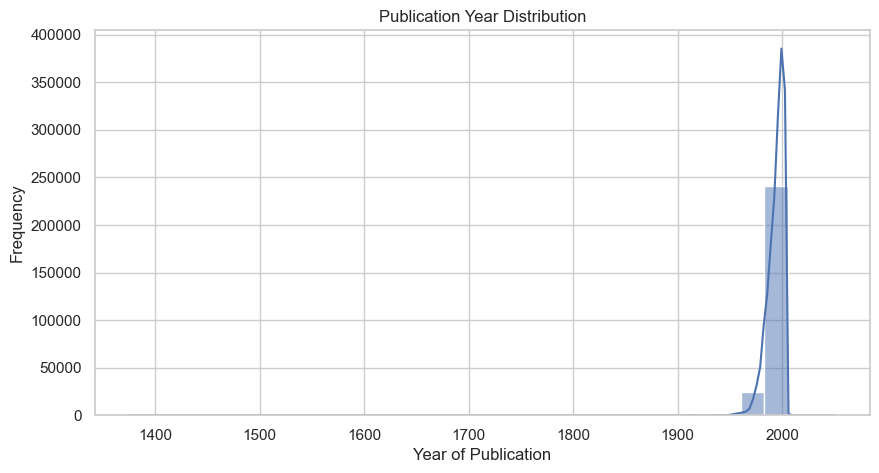

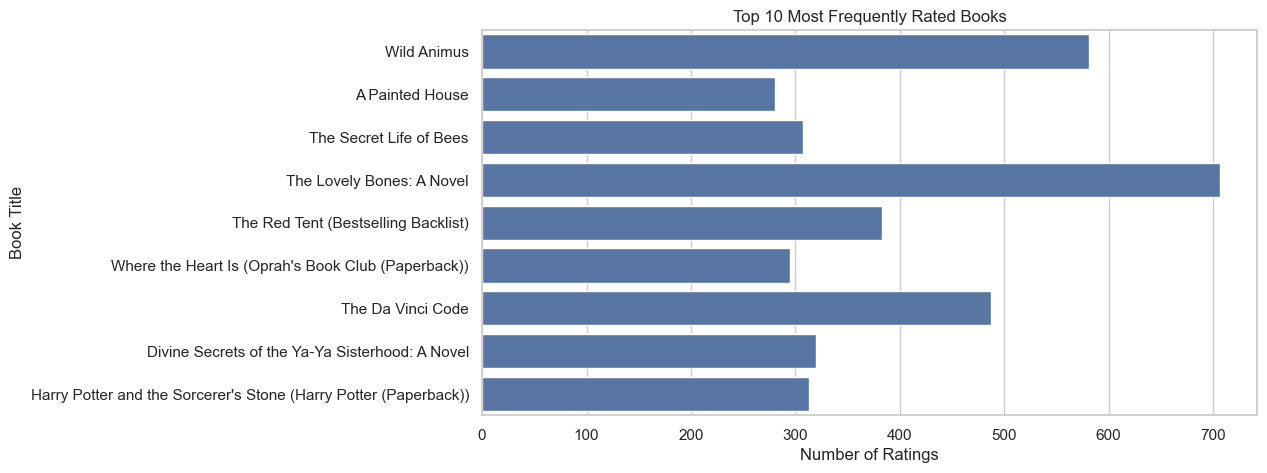

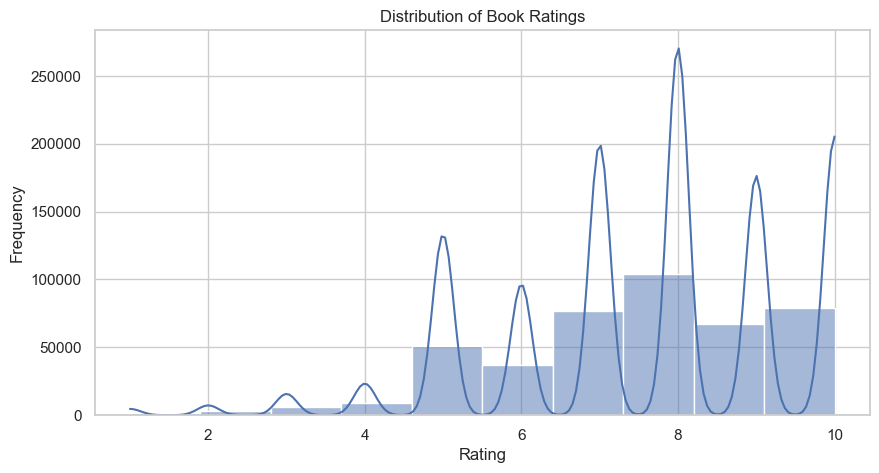

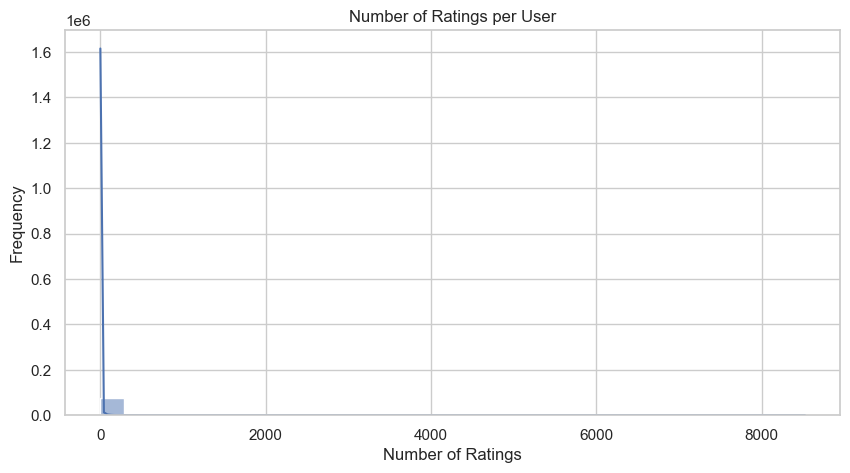

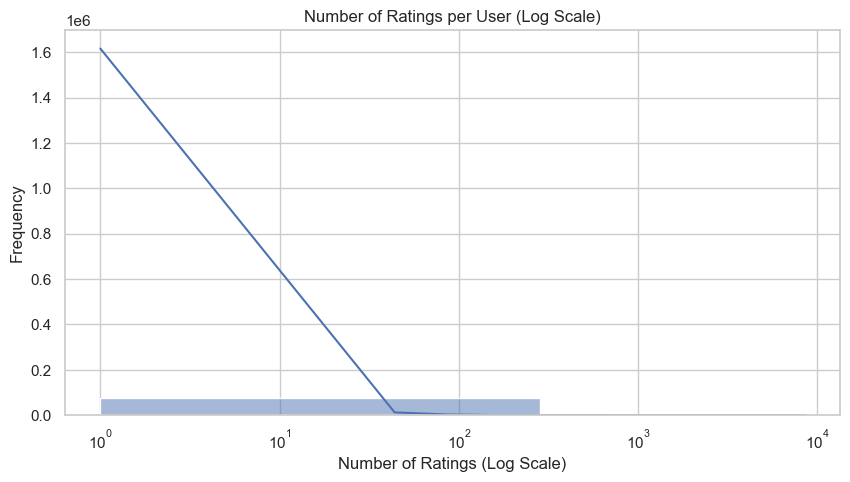

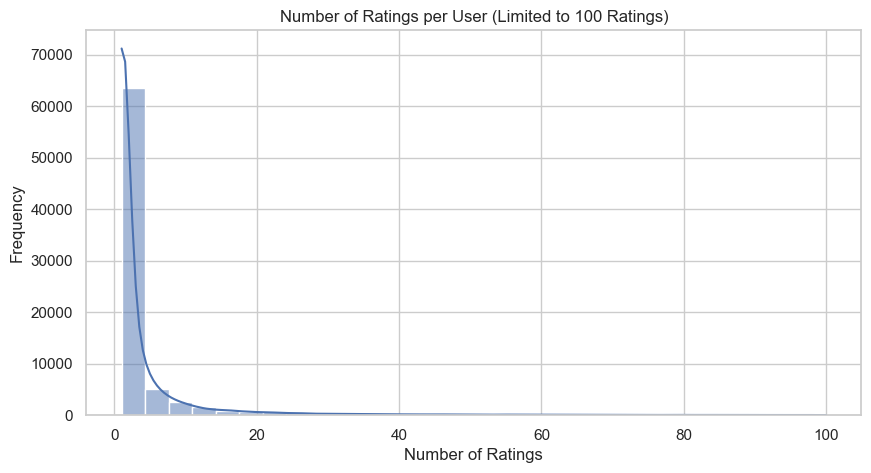

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# 1. User Demographics Analysis
plt.figure(figsize=(10, 5))
sns.histplot(users_df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Top 10 user locations
top_locations = users_df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 User Locations")
plt.xlabel("Number of Users")
plt.ylabel("Location")
plt.show()

# 2. Books Analysis
# Publication Year Distribution
plt.figure(figsize=(10, 5))
sns.histplot(books_df['Year-Of-Publication'], bins=30, kde=True)
plt.title("Publication Year Distribution")
plt.xlabel("Year of Publication")
plt.ylabel("Frequency")
plt.show()

# Most frequently rated books
top_rated_books = explicit_ratings_df['ISBN'].value_counts().head(10)
top_rated_books_titles = books_df[books_df['ISBN'].isin(top_rated_books.index)][['ISBN', 'Book-Title']]
top_rated_books_titles = top_rated_books_titles.merge(top_rated_books.rename("Rating Count"), on='ISBN')

# Plotting Top 10 Most Frequently Rated Books
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_books_titles['Rating Count'], y=top_rated_books_titles['Book-Title'])
plt.title("Top 10 Most Frequently Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


# 3. Ratings Distribution
plt.figure(figsize=(10, 5))
sns.histplot(explicit_ratings_df['Book-Rating'], bins=10, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Ratings per user (to see if some users rate more books than others)
user_rating_counts = explicit_ratings_df['User-ID'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

# Ratings per user with log scale for x-axis
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts, bins=30, kde=True)
plt.xscale('log')
plt.title("Number of Ratings per User (Log Scale)")
plt.xlabel("Number of Ratings (Log Scale)")
plt.ylabel("Frequency")
plt.show()

# Ratings per user with limited x-axis to focus on lower range of ratings
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts[user_rating_counts <= 100], bins=30, kde=True)
plt.title("Number of Ratings per User (Limited to 100 Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()




# Data Splitting

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the explicit ratings data into training and testing sets
train_data, test_data = train_test_split(explicit_ratings_df, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")


Training Data Size: 346936
Testing Data Size: 86735


# Baseline Models
## 1. Global Mean Model

In [5]:
# Global Mean Model
global_mean = train_data['Book-Rating'].mean()
print("Global Mean Rating:", global_mean)

# Define a function to calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(true_ratings, predicted_ratings):
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return rmse

# Calculate RMSE for the global mean model
global_mean_rmse = calculate_rmse(test_data['Book-Rating'], [global_mean] * len(test_data))
print("Global Mean RMSE:", global_mean_rmse)


Global Mean Rating: 7.601595106878502
Global Mean RMSE: 1.850251053701326


## 2. User Mean Model

In [6]:
# User Mean Model
user_mean = train_data.groupby('User-ID')['Book-Rating'].mean()

# Predict ratings based on user mean
test_data['User-Mean-Prediction'] = test_data['User-ID'].map(user_mean)

# Fill missing values (users with no history in the training set) with the global mean
test_data['User-Mean-Prediction'].fillna(global_mean, inplace=True)

# Calculate RMSE for the user mean model
user_mean_rmse = calculate_rmse(test_data['Book-Rating'], test_data['User-Mean-Prediction'])
print("User Mean RMSE:", user_mean_rmse)


User Mean RMSE: 1.6963850578887685


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\2190411041.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['User-Mean-Prediction'].fillna(global_mean, inplace=True)


In [7]:
# Item Mean Model
item_mean = train_data.groupby('ISBN')['Book-Rating'].mean()

# Predict ratings based on item mean
test_data['Item-Mean-Prediction'] = test_data['ISBN'].map(item_mean)

# Fill missing values (books with no history in the training set) with the global mean
test_data['Item-Mean-Prediction'].fillna(global_mean, inplace=True)

# Calculate RMSE for the item mean model
item_mean_rmse = calculate_rmse(test_data['Book-Rating'], test_data['Item-Mean-Prediction'])
print("Item Mean RMSE:", item_mean_rmse)


Item Mean RMSE: 1.9527478833825271


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\288730498.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Item-Mean-Prediction'].fillna(global_mean, inplace=True)


## 3. Item Mean Model

In [8]:
# Item Mean Model
item_mean = train_data.groupby('ISBN')['Book-Rating'].mean()

# Predict ratings based on item mean
test_data['Item-Mean-Prediction'] = test_data['ISBN'].map(item_mean)

# Fill missing values (books with no history in the training set) with the global mean
test_data['Item-Mean-Prediction'].fillna(global_mean, inplace=True)

# Calculate RMSE for the item mean model
item_mean_rmse = calculate_rmse(test_data['Book-Rating'], test_data['Item-Mean-Prediction'])
print("Item Mean RMSE:", item_mean_rmse)


Item Mean RMSE: 1.9527478833825271


C:\Users\devsa\AppData\Local\Temp\ipykernel_10864\288730498.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Item-Mean-Prediction'].fillna(global_mean, inplace=True)


# Collaborative Filtering with Matrix Factorization (SVD)

In [9]:
from scipy.sparse import coo_matrix

# Create a sparse matrix for the implicit library
user_ids = train_data['User-ID'].astype("category").cat.codes
book_ids = train_data['ISBN'].astype("category").cat.codes

# Create the sparse matrix with users as rows and books as columns
sparse_matrix = coo_matrix((train_data['Book-Rating'], (user_ids, book_ids)))

In [10]:
from implicit.als import AlternatingLeastSquares

# Initialize the ALS model
als_model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=30)

# Train the model on the sparse matrix
als_model.fit(sparse_matrix.T)  # Transpose to have items as rows, users as columns


s:\421 project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
s:\421 project\myenv\Lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 8 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
s:\421 project\myenv\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.014249563217163086 seconds
  warnings.warn(
100%|██████████| 30/30 [02:14<00:00,  4.49s/it]


In [11]:
# Making Predictions
import numpy as np
from sklearn.metrics import mean_squared_error

# Mapping back to user and book indices
user_map = {user_id: idx for idx, user_id in enumerate(train_data['User-ID'].astype("category").cat.categories)}
book_map = {isbn: idx for idx, isbn in enumerate(train_data['ISBN'].astype("category").cat.categories)}

# Function to predict ratings
def predict_rating(user_id, isbn):
    # Map the user and item IDs to their corresponding indices in the model's factors
    user_idx = user_map.get(user_id)
    book_idx = book_map.get(isbn)
    
    # Check if indices are valid and within bounds
    if user_idx is not None and user_idx < len(als_model.user_factors) and \
       book_idx is not None and book_idx < len(als_model.item_factors):
        # Calculate the dot product of the user and item latent factors
        user_factors = als_model.user_factors[user_idx]
        item_factors = als_model.item_factors[book_idx]
        return np.dot(user_factors, item_factors)
    else:
        # Use global mean for unknown or out-of-bounds users/items
        return global_mean


# Calculate RMSE on the test set
test_data['ALS-Prediction'] = test_data.apply(lambda x: predict_rating(x['User-ID'], x['ISBN']), axis=1)
als_rmse = np.sqrt(mean_squared_error(test_data['Book-Rating'], test_data['ALS-Prediction']))
print("ALS Model RMSE:", als_rmse)




ALS Model RMSE: 5.080103359640316


# Improve the ALS Model

In [13]:
from scipy.sparse import csr_matrix

# 1. Filter Sparse Users and Items
# Filter users with fewer than 5 ratings
user_rating_counts = train_data['User-ID'].value_counts()
filtered_users = user_rating_counts[user_rating_counts >= 5].index
filtered_train_data = train_data[train_data['User-ID'].isin(filtered_users)]

# Filter books with fewer than 5 ratings
book_rating_counts = train_data['ISBN'].value_counts()
filtered_books = book_rating_counts[book_rating_counts >= 5].index
filtered_train_data = filtered_train_data[filtered_train_data['ISBN'].isin(filtered_books)]

# Recreate the sparse matrix with filtered data and convert it to CSR format
user_ids_filtered = filtered_train_data['User-ID'].astype("category").cat.codes
book_ids_filtered = filtered_train_data['ISBN'].astype("category").cat.codes
sparse_matrix_filtered = csr_matrix((filtered_train_data['Book-Rating'], (user_ids_filtered, book_ids_filtered)))

# 2. Parameter Tuning and Retrain ALS Model
print("Testing ALS with different parameters...")
als_model_tuned = AlternatingLeastSquares(factors=50, regularization=0.05, iterations=40)
als_model_tuned.fit(sparse_matrix_filtered.T)

# 3. Hybrid Approach with Fallback
def hybrid_predict_rating(user_id, isbn):
    user_idx = user_map.get(user_id)
    book_idx = book_map.get(isbn)
    
    if user_idx is not None and user_idx < len(als_model_tuned.user_factors) and \
       book_idx is not None and book_idx < len(als_model_tuned.item_factors):
        # ALS Prediction
        user_factors = als_model_tuned.user_factors[user_idx]
        item_factors = als_model_tuned.item_factors[book_idx]
        return np.dot(user_factors, item_factors)
    elif user_id in user_mean:  # Fallback to User Mean if ALS prediction not possible
        return user_mean[user_id]
    elif isbn in item_mean:  # Fallback to Item Mean if ALS/User Mean not available
        return item_mean[isbn]
    else:
        return global_mean  # Fallback to Global Mean if no other prediction is possible

# Calculate Hybrid Model RMSE
test_data['Hybrid-ALS-Prediction'] = test_data.apply(lambda x: hybrid_predict_rating(x['User-ID'], x['ISBN']), axis=1)
hybrid_als_rmse = np.sqrt(mean_squared_error(test_data['Book-Rating'], test_data['Hybrid-ALS-Prediction']))
print("Hybrid ALS Model RMSE:", hybrid_als_rmse)


s:\421 project\myenv\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0 seconds
  warnings.warn(


Testing ALS with different parameters...


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]


Hybrid ALS Model RMSE: 1.8610891561458394


# Evaluation and Additional Metrics:

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a threshold for "liked" ratings
rating_threshold = 7

# Generate binary labels for actual and predicted ratings based on the threshold
test_data['Actual_Label'] = (test_data['Book-Rating'] >= rating_threshold).astype(int)
test_data['Predicted_Label'] = (test_data['Hybrid-ALS-Prediction'] >= rating_threshold).astype(int)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(test_data['Actual_Label'], test_data['Predicted_Label'])
recall = recall_score(test_data['Actual_Label'], test_data['Predicted_Label'])
f1 = f1_score(test_data['Actual_Label'], test_data['Predicted_Label'])

# Display the results
print("Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Metrics:
Precision: 0.8188
Recall: 0.8514
F1 Score: 0.8348


# Analyze Recommendations:

## Comparison Table

In [15]:
import pandas as pd

# Data for the comparison table
model_data = {
    "Model": ["Global Mean", "User Mean", "Item Mean", "ALS", "Hybrid ALS"],
    "RMSE": [1.8503, 1.6964, 1.9527, 5.0801, 1.8611],  # Adjust with exact values you observed
    "Precision": [None, None, None, None, 0.8188],  # Only Hybrid ALS has additional metrics
    "Recall": [None, None, None, None, 0.8514],
    "F1 Score": [None, None, None, None, 0.8348]
}

# Create and display the comparison table
comparison_table = pd.DataFrame(model_data)
print("Model Performance Comparison:")
print(comparison_table)


Model Performance Comparison:
         Model    RMSE  Precision  Recall  F1 Score
0  Global Mean  1.8503        NaN     NaN       NaN
1    User Mean  1.6964        NaN     NaN       NaN
2    Item Mean  1.9527        NaN     NaN       NaN
3          ALS  5.0801        NaN     NaN       NaN
4   Hybrid ALS  1.8611     0.8188  0.8514    0.8348


## Analyze Recommendations for Sample Users

In [20]:
# Function to get top recommendations for a user
def get_top_recommendations(user_id, num_recommendations=5):
    user_idx = user_map.get(user_id)
    # print(user_map)
    if user_idx is not None:
        # Get scores for all items
        scores = als_model.user_factors[user_idx] @ als_model.item_factors.T
        
        # Get the top item indices
        top_indices = scores.argsort()[::-1][:num_recommendations]
        
        # Map indices back to ISBN and get book titles
        top_books = [list(book_map.keys())[idx] for idx in top_indices]
        top_book_titles = books_df[books_df['ISBN'].isin(top_books)]['Book-Title'].tolist()
        
        return top_book_titles
    else:
        return "User not found in the model."

# Example: Get top recommendations for a sample user
sample_user_ids = [26,12,6,17,19]  # Replace with an actual User-ID from your dataset
for sample_user_id in sample_user_ids:
    print(f"Top Recommendations for User {sample_user_id}:")
    print(get_top_recommendations(sample_user_id))


Top Recommendations for User 26:
['Whirlwind (The X-Files)', 'Snipe Hunt (Professor Simon Shaw Mysteries)', 'Whoppers: Tall Tales and Other Lies', 'A Lady of His Own', "I'Ve Forgotten Everything I Learned in School: A Refresher Course to Help You Reclaim Your Education"]
Top Recommendations for User 12:
['Orphan Journey Home', 'Green Ice']
Top Recommendations for User 6:
User not found in the model.
Top Recommendations for User 17:
['Anne of Avonlea (Anne of Green Gables Novels (Paperback))', 'Words I Wish I Wrote: A Collection of Writing That Inspired My Ideas', 'Celebrate the Earth: A Year of Holidays in the Pagan Tradition', 'Butterscotch Blues']
Top Recommendations for User 19:
['My Name Is Asher Lev', 'Maya Angelou: Poems', 'Summer Light', "Favorite Animal Poems (Dover Children's Thrift Classics)"]


## Fine-Tuning Thresholds for Precision, Recall, and F1 Score

In [21]:
# Experiment with different rating thresholds
for threshold in [6, 7, 8]:
    print(f"\nThreshold: {threshold}")
    
    # Generate binary labels based on the new threshold
    test_data['Actual_Label'] = (test_data['Book-Rating'] >= threshold).astype(int)
    test_data['Predicted_Label'] = (test_data['Hybrid-ALS-Prediction'] >= threshold).astype(int)
    
    # Calculate and print Precision, Recall, and F1 Score
    precision = precision_score(test_data['Actual_Label'], test_data['Predicted_Label'])
    recall = recall_score(test_data['Actual_Label'], test_data['Predicted_Label'])
    f1 = f1_score(test_data['Actual_Label'], test_data['Predicted_Label'])
    
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



Threshold: 6
Precision: 0.8682, Recall: 0.9512, F1 Score: 0.9078

Threshold: 7
Precision: 0.8188, Recall: 0.8514, F1 Score: 0.8348

Threshold: 8
Precision: 0.7633, Recall: 0.4942, F1 Score: 0.5999
